# Plot global maps of correlations, ens means and ens spread, as well as correlations at select column locations.

### Load Packages

In [1]:
import numpy as np
import xarray as xr
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import cmocean as cmo
from cartopy.util import add_cyclic_point

In [2]:
cd /Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts

/Users/zstanley/Documents/git_repos/obs_loc_for_scda/scripts


In [3]:
from post_processing_fns import *
from letkf import *

In [4]:
these_columns = {
  'lons' : [-154.5, 35.5, 75.5, -150.5, 160.5],
  'lats' : [-27.5, -49.5, -31.5, 12.5, 40.5],
  'name' : ['South Pacific', 'Southern Ocean', 'Indian Ocean', 'Tropical Pacific', 'North Pacific'],
  'save_name' : ['south_pacific2', 'southern_ocean2', 'indian_ocean2', 'tropical_pacific2', 'north_pacific']
}

In [5]:
## Where are we working
proj_dir = '/Users/zstanley/Documents/git_repos/obs_loc_for_scda'
plot_dir = proj_dir + '/plots/paper/'
my_data_dir = proj_dir + '/my_data/20151206.030000'
nb_dir = proj_dir + '/notebooks'

### Define colors

In [6]:
raisin_black = [45/256, 42/256, 50/256]
heliotrope_gray = [162/256, 155/256, 171/256]
pacific_blue = [37/256, 162/256, 192/256]
deep_saffron = [255/256, 145/256, 51/256]

### Plot T-T correlations

In [7]:
sst_ast_corr = xr.open_dataset(my_data_dir+'/sst_ast_corr.nc')

In [8]:
data = sst_ast_corr['__xarray_dataarray_variable__']
lon = sst_ast_corr['lon']
lat = sst_ast_corr['lat']
data, lon = add_cyclic_point(data, coord=lon)

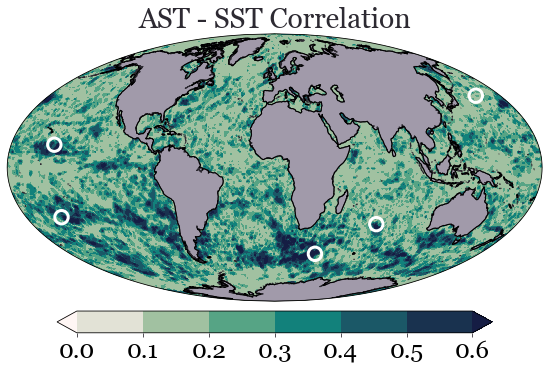

In [10]:
## Save a map of the world showing column locations
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
im = ax.contourf(lon, lat, data, levels = np.linspace(0,0.6,7),cmap=cmo.cm.tempo, extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=raisin_black, facecolor=heliotrope_gray))
cbar = plt.colorbar(im, orientation='horizontal', pad=0.03, shrink=0.65, extend='both')
cbar.ax.tick_params(labelsize=24, color=raisin_black)
plt.title('AST - SST Correlation', fontsize=28, color=raisin_black)
ax.coastlines(resolution='110m')
#ax.gridlines()
ax.scatter(these_columns['lons'], these_columns['lats'],transform=ccrs.PlateCarree(),facecolors='none', edgecolors='w', s=180, linewidth=3)

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.savefig(plot_dir+'/sst_ast_corr_with_column_locations.pdf')
plt.show()

### Plot vertical correlations

In [10]:
## Load vertical columns
south_pacific = xr.open_dataset(my_data_dir+'/five_columns_'+these_columns['save_name'][0]+'.nc')
southern_ocean = xr.open_dataset(my_data_dir+'/five_columns_'+these_columns['save_name'][1]+'.nc')
indian_ocean = xr.open_dataset(my_data_dir+'/five_columns_'+these_columns['save_name'][2]+'.nc')
tropical_pacific = xr.open_dataset(my_data_dir+'/five_columns_'+these_columns['save_name'][3]+'.nc')
north_pacific = xr.open_dataset(my_data_dir+'/five_columns_'+these_columns['save_name'][4]+'.nc')

In [11]:
## South Pacific
sp_corr = xr.Dataset()
sp_corr['sst_atm_T'] = xr.corr(south_pacific['sst'], south_pacific['atm_T'], dim = 'ens_mem')
sp_corr['sst_ocn_T'] = xr.corr(south_pacific['sst'], south_pacific['ocn_Temp'], dim = 'ens_mem')
sp_corr['ast_atm_T'] = xr.corr(south_pacific['atm_t2m'], south_pacific['atm_T'], dim = 'ens_mem')
sp_corr['ast_ocn_T'] = xr.corr(south_pacific['atm_t2m'], south_pacific['ocn_Temp'], dim = 'ens_mem')
sp_corr['atm_p'] = south_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
sp_corr = sp_corr.mean(['lat', 'lon'])

## Southern Ocean
so_corr = xr.Dataset()
so_corr['sst_atm_T'] = xr.corr(southern_ocean['sst'], southern_ocean['atm_T'], dim = 'ens_mem')
so_corr['sst_ocn_T'] = xr.corr(southern_ocean['sst'], southern_ocean['ocn_Temp'], dim = 'ens_mem')
so_corr['ast_atm_T'] = xr.corr(southern_ocean['atm_t2m'], southern_ocean['atm_T'], dim = 'ens_mem')
so_corr['ast_ocn_T'] = xr.corr(southern_ocean['atm_t2m'], southern_ocean['ocn_Temp'], dim = 'ens_mem')
so_corr['atm_p'] = southern_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
so_corr = so_corr.mean(['lat', 'lon'])

## Indian Ocean
io_corr = xr.Dataset()
io_corr['sst_atm_T'] = xr.corr(indian_ocean['sst'], indian_ocean['atm_T'], dim = 'ens_mem')
io_corr['sst_ocn_T'] = xr.corr(indian_ocean['sst'], indian_ocean['ocn_Temp'], dim = 'ens_mem')
io_corr['ast_atm_T'] = xr.corr(indian_ocean['atm_t2m'], indian_ocean['atm_T'], dim = 'ens_mem')
io_corr['ast_ocn_T'] = xr.corr(indian_ocean['atm_t2m'], indian_ocean['ocn_Temp'], dim = 'ens_mem')
io_corr['atm_p'] = indian_ocean['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
io_corr = io_corr.mean(['lat', 'lon'])

## Tropical Pacific
tp_corr = xr.Dataset()
tp_corr['sst_atm_T'] = xr.corr(tropical_pacific['sst'], tropical_pacific['atm_T'], dim = 'ens_mem')
tp_corr['sst_ocn_T'] = xr.corr(tropical_pacific['sst'], tropical_pacific['ocn_Temp'], dim = 'ens_mem')
tp_corr['ast_atm_T'] = xr.corr(tropical_pacific['atm_t2m'], tropical_pacific['atm_T'], dim = 'ens_mem')
tp_corr['ast_ocn_T'] = xr.corr(tropical_pacific['atm_t2m'], tropical_pacific['ocn_Temp'], dim = 'ens_mem')
tp_corr['atm_p'] = tropical_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
tp_corr = tp_corr.mean(['lat', 'lon'])

## North Pacific
np_corr = xr.Dataset()
np_corr['sst_atm_T'] = xr.corr(north_pacific['sst'], north_pacific['atm_T'], dim = 'ens_mem')
np_corr['sst_ocn_T'] = xr.corr(north_pacific['sst'], north_pacific['ocn_Temp'], dim = 'ens_mem')
np_corr['ast_atm_T'] = xr.corr(north_pacific['atm_t2m'], north_pacific['atm_T'], dim = 'ens_mem')
np_corr['ast_ocn_T'] = xr.corr(north_pacific['atm_t2m'], north_pacific['ocn_Temp'], dim = 'ens_mem')
np_corr['atm_p'] = north_pacific['atm_delp'].mean('ens_mem').cumsum(dim='atm_lev') / 1e2
np_corr = np_corr.mean(['lat', 'lon'])

In [12]:
## Get indices
# atmosphere
num_atm_levs = len(south_pacific['atm_lev'])
indt2m = num_atm_levs - 1
ind100hPa = np.argmin(np.abs(sp_corr['atm_p'].values-100))
# ocean
ind0m = num_atm_levs
ind150m_ocn = np.argmin(np.abs(sp_corr['ocn_lev'].values-150))
ind500m_ocn = np.argmin(np.abs(sp_corr['ocn_lev'].values-500))
ind150m = ind0m + ind150m_ocn
ind500m = ind0m + ind500m_ocn
num_ocn_levs = len(south_pacific['ocn_lev'])

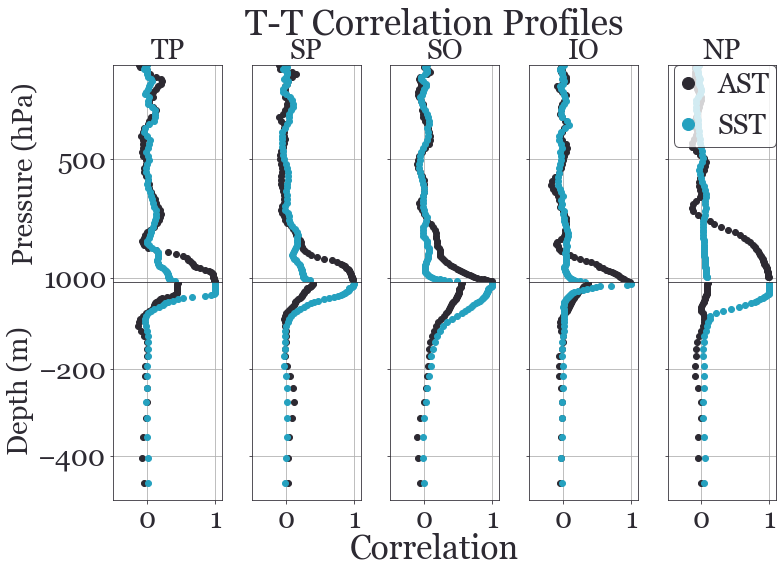

In [20]:
## Create subplots
fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey='row') 

## T2m
# Plot atm correlations
axs[0, 0].plot(tp_corr['ast_atm_T'][ind100hPa:], tp_corr['atm_p'][ind100hPa:], 'o', color=raisin_black, linewidth=5)
axs[0, 1].plot(sp_corr['ast_atm_T'][ind100hPa:], sp_corr['atm_p'][ind100hPa:], 'o', color=raisin_black, linewidth=5)
axs[0, 2].plot(so_corr['ast_atm_T'][ind100hPa:], so_corr['atm_p'][ind100hPa:], 'o', color=raisin_black, linewidth=5)
axs[0, 3].plot(io_corr['ast_atm_T'][ind100hPa:], io_corr['atm_p'][ind100hPa:], 'o', color=raisin_black, linewidth=5)
axs[0, 4].plot(np_corr['ast_atm_T'][ind100hPa:], np_corr['atm_p'][ind100hPa:], 'o', color=raisin_black, linewidth=5, label='AST')

# Plot ocn correlations
axs[1, 0].plot(tp_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * tp_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=raisin_black, linewidth=5)
axs[1, 1].plot(sp_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * sp_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=raisin_black, linewidth=5)
axs[1, 2].plot(so_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * so_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=raisin_black, linewidth=5)
axs[1, 3].plot(io_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * io_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=raisin_black, linewidth=5)
axs[1, 4].plot(np_corr['ast_ocn_T'][:ind500m_ocn+1], -1 * np_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=raisin_black, linewidth=5)
    
    
## SST
# Plot atm correlations
axs[0, 0].plot(tp_corr['sst_atm_T'][ind100hPa:], tp_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5)
axs[0, 1].plot(sp_corr['sst_atm_T'][ind100hPa:], sp_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5)
axs[0, 2].plot(so_corr['sst_atm_T'][ind100hPa:], so_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5)
axs[0, 3].plot(io_corr['sst_atm_T'][ind100hPa:], io_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5)
axs[0, 4].plot(np_corr['sst_atm_T'][ind100hPa:], np_corr['atm_p'][ind100hPa:], 'o', color=pacific_blue, linewidth=5, label='SST')

# Plot ocn correlations
axs[1, 0].plot(tp_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * tp_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)
axs[1, 1].plot(sp_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * sp_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)
axs[1, 2].plot(so_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * so_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)
axs[1, 3].plot(io_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * io_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)
axs[1, 4].plot(np_corr['sst_ocn_T'][:ind500m_ocn+1], -1 * np_corr['ocn_lev'][:ind500m_ocn+1], 'o', color=pacific_blue, linewidth=5)

# Set titles
axs[0,0].set_title('TP', color=raisin_black, fontsize=28)
axs[0,1].set_title('SP', color=raisin_black, fontsize=28)
axs[0,2].set_title('SO', color=raisin_black, fontsize=28)
axs[0,3].set_title('IO', color=raisin_black, fontsize=28)
axs[0,4].set_title('NP', color=raisin_black, fontsize=28)

# Add correlation
#axs[1,0].set_xlabel('cross-corr = '+str('%.2f'%tp_corr['sst_atm_T'][indt2m].values))
#axs[1,1].set_xlabel('cross-corr = '+str('%.2f'%sp_corr['sst_atm_T'][indt2m].values))
#axs[1,2].set_xlabel('cross-corr = '+str('%.2f'%so_corr['sst_atm_T'][indt2m].values))
#axs[1,3].set_xlabel('cross-corr = '+str('%.2f'%io_corr['sst_atm_T'][indt2m].values))
#axs[1,4].set_xlabel('cross-corr = '+str('%.2f'%np_corr['sst_atm_T'][indt2m].values))

# Adjust and label axes
axs[0, 0].set_xlim([-0.5, 1.1])
axs[0, 0].set_ylim([100,1019])
axs[0, 0].invert_yaxis()
axs[1, 0].set_ylim([-500,-1])
axs[0, 0].set_ylabel('Pressure (hPa)', color=raisin_black)
axs[1, 0].set_ylabel('Depth (m)', color=raisin_black)
fig.supxlabel('Correlation', color=raisin_black)
fig.suptitle('T-T Correlation Profiles', color=raisin_black, fontsize=36)

# Legend
leg = axs[0,4].legend(labelcolor=raisin_black, loc='upper right', borderaxespad=0,  borderpad=0.25, handlelength=.5, markerscale=2)
leg.get_frame().set_edgecolor(raisin_black)

# Adjust aesthetics
plt.subplots_adjust(hspace=.0)
for ax in axs.reshape(-1):
    ax.grid()
    ax.set_box_aspect(2)
    ax.spines['bottom'].set_color(raisin_black)
    ax.spines['top'].set_color(raisin_black) 
    ax.spines['right'].set_color(raisin_black)
    ax.spines['left'].set_color(raisin_black)
    ax.xaxis.label.set_color(raisin_black)
    ax.yaxis.label.set_color(raisin_black)
    ax.tick_params(colors=raisin_black, which='both') 


plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.rcParams.update({'font.size':28})
plt.savefig(plot_dir+'/ast_sst_temp_corr_five_columns.pdf')
plt.show()

## Plot temperature mean and std

In [11]:
ds_mean = xr.open_dataset(my_data_dir+'/coupled_temperature_meanfield_surface_level.nc')

In [8]:
ds_std = xr.open_dataset(my_data_dir+'/coupled_temperature_std_surface_level.nc')

In [68]:
data = ds_mean['atm_T']-273.15
lon = ds_mean['lon']
lat = ds_mean['lat']
data, lon = add_cyclic_point(data, coord=lon)

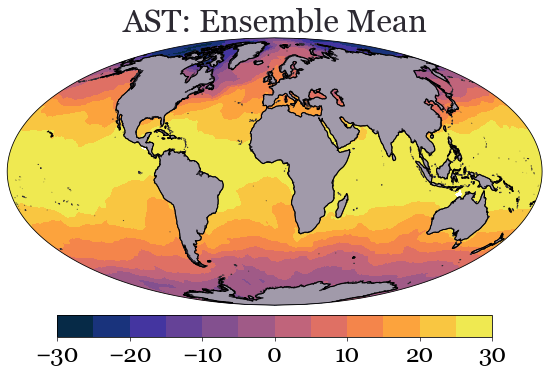

In [69]:
## Save a map of the world showing column locations
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
im = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), levels = np.linspace(-30,30,13), cmap = cmo.cm.thermal)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=raisin_black, facecolor=heliotrope_gray))
cbar = plt.colorbar(im, orientation='horizontal', pad=0.03, shrink=0.65, extend='both')
cbar.ax.tick_params(labelsize=24, color=raisin_black)
plt.title('AST: Ensemble Mean', fontsize=32, color=raisin_black)
ax.coastlines(resolution='110m')
#ax.gridlines()
#ax.scatter(these_columns['lons'], these_columns['lats'],transform=ccrs.PlateCarree(),facecolors='none', edgecolors=raisin_black, s=180, linewidth=3)

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.savefig(plot_dir+'/ast_ens_mean.pdf')
plt.show()

In [70]:
data = ds_mean['ocn_Temp']
lon = ds_mean['lon']
lat = ds_mean['lat']
data, lon = add_cyclic_point(data, coord=lon)

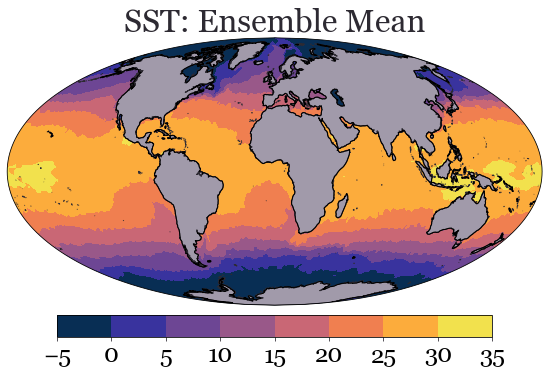

In [71]:
## Save a map of the world showing column locations
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
im = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), levels = np.linspace(-5,35,9), cmap = cmo.cm.thermal)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=raisin_black, facecolor=heliotrope_gray))
cbar = plt.colorbar(im, orientation='horizontal', pad=0.03, shrink=0.65, extend='both')
cbar.ax.tick_params(labelsize=24, color=raisin_black)
plt.title('SST: Ensemble Mean', fontsize=32, color=raisin_black)
ax.coastlines(resolution='110m')
#ax.gridlines()
#ax.scatter(these_columns['lons'], these_columns['lats'],transform=ccrs.PlateCarree(),facecolors='none', edgecolors=raisin_black, s=180, linewidth=3)

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.savefig(plot_dir+'/sst_ens_mean.pdf')
plt.show()

In [9]:
data = ds_std['atm_T']
lon = ds_std['lon']
lat = ds_std['lat']
data, lon = add_cyclic_point(data, coord=lon)

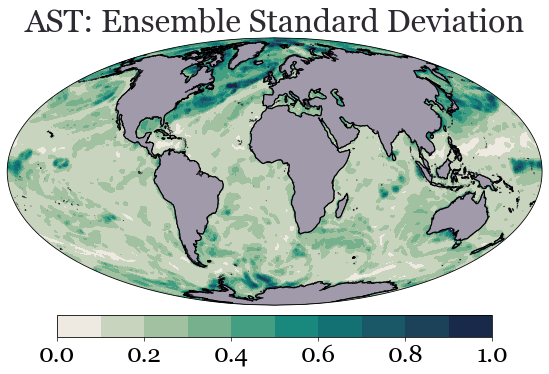

In [11]:
## Save a map of the world showing column locations
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
im = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), levels = np.linspace(0,1.0,11), cmap = cmo.cm.tempo)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=raisin_black, facecolor=heliotrope_gray))
cbar = plt.colorbar(im, orientation='horizontal', pad=0.03, shrink=0.65, extend='both')
cbar.ax.tick_params(labelsize=24, color=raisin_black)
plt.title('AST: Ensemble Standard Deviation', fontsize=32, color=raisin_black)
ax.coastlines(resolution='110m')
#ax.gridlines()
#ax.scatter(these_columns['lons'], these_columns['lats'],transform=ccrs.PlateCarree(),facecolors='none', edgecolors=raisin_black, s=180, linewidth=3)

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.savefig(plot_dir+'/ast_ens_spread.pdf')
plt.show()

In [12]:
data = ds_std['ocn_Temp']
lon = ds_std['lon']
lat = ds_std['lat']
data, lon = add_cyclic_point(data, coord=lon)

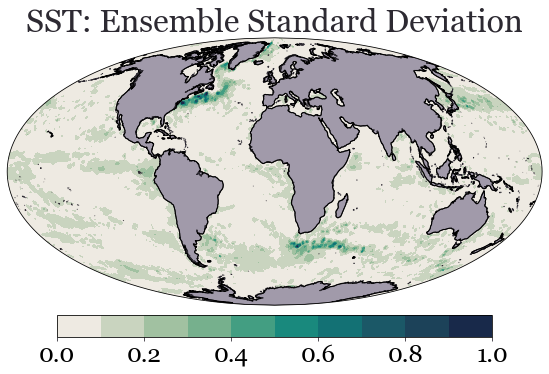

In [13]:
## Save a map of the world showing column locations
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
im = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), levels = np.linspace(0,1.0,11), cmap = cmo.cm.tempo)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=raisin_black, facecolor=heliotrope_gray))
cbar = plt.colorbar(im, orientation='horizontal', pad=0.03, shrink=0.65, extend='both')
cbar.ax.tick_params(labelsize=24, color=raisin_black)
plt.title('SST: Ensemble Standard Deviation', fontsize=32, color=raisin_black)
ax.coastlines(resolution='110m')
#ax.gridlines()
#ax.scatter(these_columns['lons'], these_columns['lats'],transform=ccrs.PlateCarree(),facecolors='none', edgecolors=raisin_black, s=180, linewidth=3)

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams.update({'font.sans-serif':'Georgia'})
plt.savefig(plot_dir+'/sst_ens_spread.pdf')
plt.show()